In [1]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00


In [2]:
import praw

REDDIT_CLIENT_ID = "Ewh28UI9H7w1A4IashZcxg"
REDDIT_SECRET = "FeNXFO-T4DL3Vwd26SPlDE2tD4XhUA"
REDDIT_USER_AGENT = "AskWomenScraper v1.0 by u/Signal_Rich7741"

reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    user_agent=REDDIT_USER_AGENT
)


In [3]:
#Auth
reddit = praw.Reddit(
    client_id="Ewh28UI9H7w1A4IashZcxg",  # Replace with your actual client ID
    client_secret="FeNXFO-T4DL3Vwd26SPlDE2tD4XhUA",  # Replace with your actual client secret
    user_agent="AskWomenScraper v1.0 by u/Signal_Rich7741"  # Replace with your user agent
)

# Paste my top 20 thread URLs here from the past month:
urls = [
  "https://www.reddit.com/r/AskWomen/comments/1jz543f/women_of_reddit_what_is_the_worst_job_you_ever_had/",
  "https://www.reddit.com/r/AskWomen/comments/1jzlyx7/what_article_of_clothingaccessory_makes_you_feel/",
  "https://www.reddit.com/r/AskWomen/comments/1jz1r17/how_does_being_blonde_or_brunette_affect_the_way/",
  "https://www.reddit.com/r/AskWomen/comments/1jzki9e/what_if_any_safety_precautions_do_you_take_while/",
  "https://www.reddit.com/r/AskWomen/comments/1jy0boc/what_did_emotional_abuse_look_like_in_your/",
  "https://www.reddit.com/r/AskWomen/comments/1jxgi19/when_did_you_experience_your_first_orgasm/",
  "https://www.reddit.com/r/AskWomen/comments/1jvuuhn/what_small_things_tend_to_push_you_over_the_edge/",
  "https://www.reddit.com/r/AskWomen/comments/1jvrvjh/what_do_you_wish_you_knew_before_moving_in_with_a/",
  "https://www.reddit.com/r/AskWomen/comments/1jsyitz/ladies_whats_the_most_ridiculous_lie_a_man_has/",
  "https://www.reddit.com/r/AskWomen/comments/1jqiq6o/women_who_experienced_postpartum_depression_what/",
  "https://www.reddit.com/r/AskWomen/comments/1jq3c50/those_who_have_broken_up_because_you_each_wanted/",
  'https://www.reddit.com/r/AskWomen/comments/1k02gmr/ladies_if_you_were_caught_cheating_by_your/',
  "https://www.reddit.com/r/AskWomen/comments/1jyi6sz/what_helped_get_your_spark_back_after_a_bad_break/",
  "https://www.reddit.com/r/AskWomen/comments/1jy0tx3/married_what_is_your_greatest_regret_about/",
  "https://www.reddit.com/r/AskWomen/comments/1jst9kk/how_often_do_you_look_at_your_partners_phone/",
  "https://www.reddit.com/r/AskWomen/comments/1jpicj1/daughters_whats_something_your_mom_never_told_you/",
  "https://www.reddit.com/r/AskWomen/comments/1jpqaxz/women_who_have_completely_changed_careers_in/",
  "https://www.reddit.com/r/AskWomen/comments/1jpanfc/how_do_you_view_physical_infidelity_vs_emotional/",
  "https://www.reddit.com/r/AskWomen/comments/1jkdgt5/what_is_something_your_mother_raised_you_to/",
  "https://www.reddit.com/r/AskWomen/comments/1jhitks/how_do_you_initiate_intimacy_with_your_partner/"


]

rows = []

for url in urls:
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=0)  # Expand all comments

    for comment in submission.comments.list():
        if not comment.author:
            continue
        rows.append({
            "thread_title": submission.title,
            "comment_body": comment.body,
            "comment_author": comment.author.name,
            "created_utc": comment.created_utc,
            "comment_depth": comment.depth,
            "comment_score": comment.score
        })

# Save to CSV
import pandas as pd
df = pd.DataFrame(rows)
df.to_csv("askwomen_manual_top20.csv", index=False)
print("✅ Saved CSV with", len(df), "comments")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ Saved CSV with 4400 comments


In [4]:
#Install packages for preprocessing

import pandas as pd

!pip install langdetect

!pip install contractions

import contractions


import re
from langdetect import detect

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stopwords
stop_words = set(stopwords.words('english')) # Set of stopwords in English

# Load your dataset
df = pd.read_csv("askwomen_manual_top20.csv")

# Convert timestamp
df["comment_datetime"] = pd.to_datetime(df["created_utc"], unit='s')

# Save the new version with the datetime column included
df.to_csv("askwomen_preprocessed_with_datetime.csv", index=False)

df = pd.read_csv("askwomen_preprocessed_with_datetime.csv")

df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=1fcf4f884a41ecdf03a7e87571f45495328ba834678db0f1e6ebdf09003a5e0c
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02
...,...,...,...,...,...,...,...
4395,How do you initiate intimacy with your partner...,Hello /u/eeerrrrft. Thank you for participatin...,AutoModerator,1.742716e+09,2,1,2025-03-23 07:40:36
4396,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58
4397,How do you initiate intimacy with your partner...,Hello /u/Alert-Cap8800. **Please read this ent...,AutoModerator,1.742850e+09,2,1,2025-03-24 20:52:50
4398,How do you initiate intimacy with your partner...,Hello /u/under_scorer99. **Please read this en...,AutoModerator,1.742915e+09,2,1,2025-03-25 15:07:01


In [5]:
#Apply Preprocessing

# 🧼 Step 1: Remove moderator and deleted/removed comments
df = df[
    (~df["comment_author"].str.lower().str.contains("moderator", na=False)) &
    (~df["comment_body"].str.lower().isin(["[deleted]", "[removed]"]))
].copy()


# Step 2: Preprocessing function (preserves emojis, removes Reddit mentions + noise)
def preprocess(text):
    text = text.lower()  # lowercase
    text = contractions.fix(text)  # expand contractions like "i'm" → "i am"
    text = text.strip()  # trim whitespace
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"u/\w+", "", text)  # remove u/username
    text = re.sub(r"r/\w+", "", text)  # remove r/subreddit
    text = re.sub(r"[!]{2,}", "!", text)  # collapse !!!
    text = re.sub(r"[?]{2,}", "?", text)  # collapse ???
    text = re.sub(r"[.]{2,}", ".", text)  # collapse ...
    text = ' '.join(word for word in text.split() if word not in stop_words) #remove stopwords here

    return text

df["cleaned_comment"] = df["comment_body"].apply(preprocess)
df


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime,cleaned_comment
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21,anything customer service fkn worth it.
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38,waitress. constantly getting flirted guys got ...
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13,volunteered lead daisy troop daughters younger...
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51,waitress people awful service workers. number ...
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02,waitress tourist trap seafood restaurant seatt...
...,...,...,...,...,...,...,...,...
4389,How do you initiate intimacy with your partner...,**Please read this entire message before takin...,AskWomen-ModTeam,1.743358e+09,1,1,2025-03-30 18:11:56,**please read entire message taking action.** ...
4390,How do you initiate intimacy with your partner...,I got incredibly lucky. He’s definitely someth...,Louisianimal09,1.742703e+09,2,39,2025-03-23 04:03:58,got incredibly lucky. definitely something els...
4391,How do you initiate intimacy with your partner...,"Hello, /u/AdNatural8174! **Please read this e...",AskWomen-ModTeam,1.742756e+09,2,1,2025-03-23 18:56:06,"hello, /yo! **please read entire message takin..."
4396,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58,"hello, /yo! **please read entire message takin..."


In [6]:
# 1️⃣ Install and load spaCy
import numpy as np
!pip install spacy
import spacy
from collections import Counter

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# ✅ PART 1: Create noun phrase counter for visual insights
np_counter = Counter()

for comment in df["cleaned_comment"]:
    doc = nlp(comment)
    for np in doc.noun_chunks:
        np_text = np.text.strip().lower()
        if len(np_text.split()) >= 2:  # Only meaningful multi-word phrases
            np_counter[np_text] += 1

# OPTIONAL: View top 20 noun phrases
print(np_counter.most_common(20))


# ✅ PART 2: Create spaCy-filtered + lemmatized comment column
def spacy_filter(text):
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"}
        and not token.is_stop
        and not token.is_punct
    ]
    return " ".join(tokens)

# Save result into a new column
df["spacy_filtered"] = df["cleaned_comment"].apply(spacy_filter)

# Preview to confirm
df[["cleaned_comment", "spacy_filtered"]].head()


[('first **copy link', 93), ('post comment', 93), ('paste message mod team', 93), ('link review', 93), ('contact moderators', 93), ('askwomen rules', 87), ('questions moderator action', 81), ('entire message', 70), ('[askwomen rules', 68), ('( | [askwomen faq', 68), ('reddit rules', 68), ('unsolicited advice', 41), ('top-level comment target', 28), ('* gifs', 28), ("share experience response op's question", 28), ('top-level comment', 28), ('derailing subject', 23), ('meta rating responses', 23), ('emojis media place text', 23), ('armchair diagnose', 20)]


,cleaned_comment,spacy_filtered
0,anything customer service fkn worth it.,customer service worth
1,waitress. constantly getting flirted guys got ...,waitress constantly get flirt guy get creepy
2,volunteered lead daisy troop daughters younger...,volunteer daisy troop daughter young kid delig...
3,waitress people awful service workers. number ...,waitress people awful service worker number gu...
4,waitress tourist trap seafood restaurant seatt...,waitress tourist trap double summer management...


In [7]:
# Step 4: Filter out very short comments (<10 chars)
df = df[df["spacy_filtered"].str.len() >= 10].copy()

# Step 5: Detect language, keep all languages for analysis
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

df["lang"] = df["spacy_filtered"].apply(detect_language)

df.to_csv("askwomen_FINAL_preprocessed.csv", index=False)
df = pd.read_csv("askwomen_FINAL_preprocessed.csv")
df


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime,cleaned_comment,spacy_filtered,lang
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21,anything customer service fkn worth it.,customer service worth,en
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38,waitress. constantly getting flirted guys got ...,waitress constantly get flirt guy get creepy,en
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13,volunteered lead daisy troop daughters younger...,volunteer daisy troop daughter young kid delig...,af
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51,waitress people awful service workers. number ...,waitress people awful service worker number gu...,en
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02,waitress tourist trap seafood restaurant seatt...,waitress tourist trap double summer management...,en
...,...,...,...,...,...,...,...,...,...,...
3798,How do you initiate intimacy with your partner...,**Please read this entire message before takin...,AskWomen-ModTeam,1.743358e+09,1,1,2025-03-30 18:11:56,**please read entire message taking action.** ...,read entire message take action derail topic p...,en
3799,How do you initiate intimacy with your partner...,I got incredibly lucky. He’s definitely someth...,Louisianimal09,1.742703e+09,2,39,2025-03-23 04:03:58,got incredibly lucky. definitely something els...,get incredibly lucky definitely long past hone...,en
3800,How do you initiate intimacy with your partner...,"Hello, /u/AdNatural8174! **Please read this e...",AskWomen-ModTeam,1.742756e+09,2,1,2025-03-23 18:56:06,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en
3801,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en


Exploratory Analysis

count    3803.000000
mean      122.152248
std       151.491316
min        10.000000
25%        34.500000
50%        72.000000
75%       147.000000
max      2311.000000
Name: len, dtype: float64
15


<ipython-input-8-7d24506621c9>:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


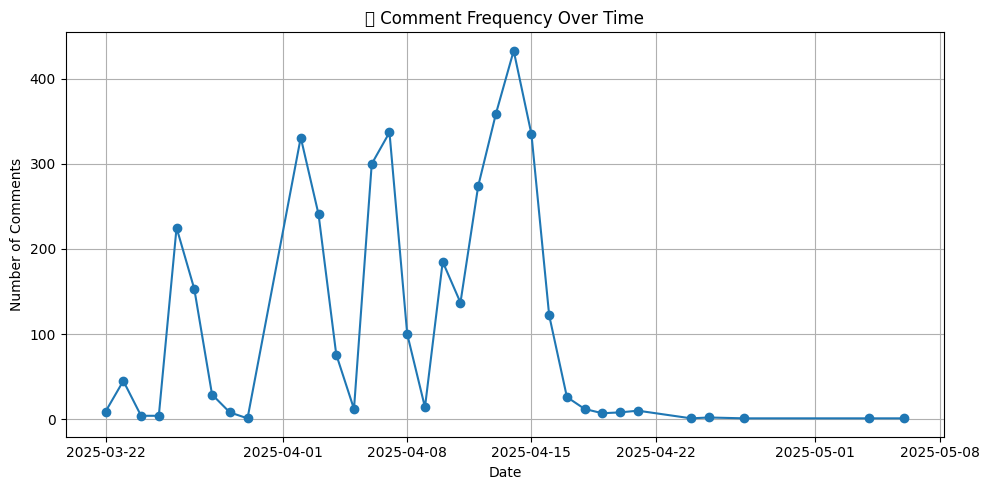

<ipython-input-8-7d24506621c9>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x="count", y="word", palette="flare")
<ipython-input-8-7d24506621c9>:47: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


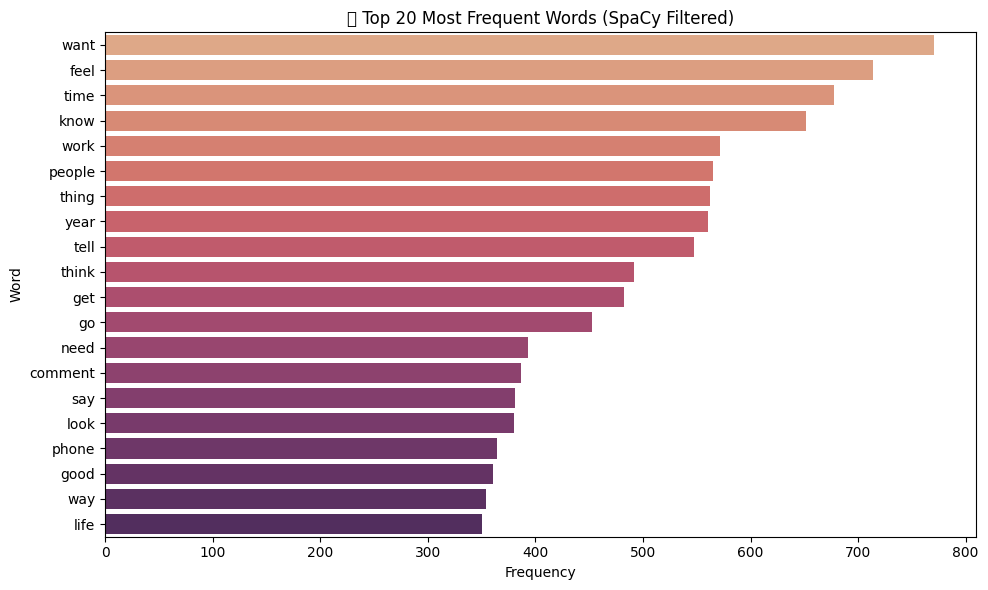

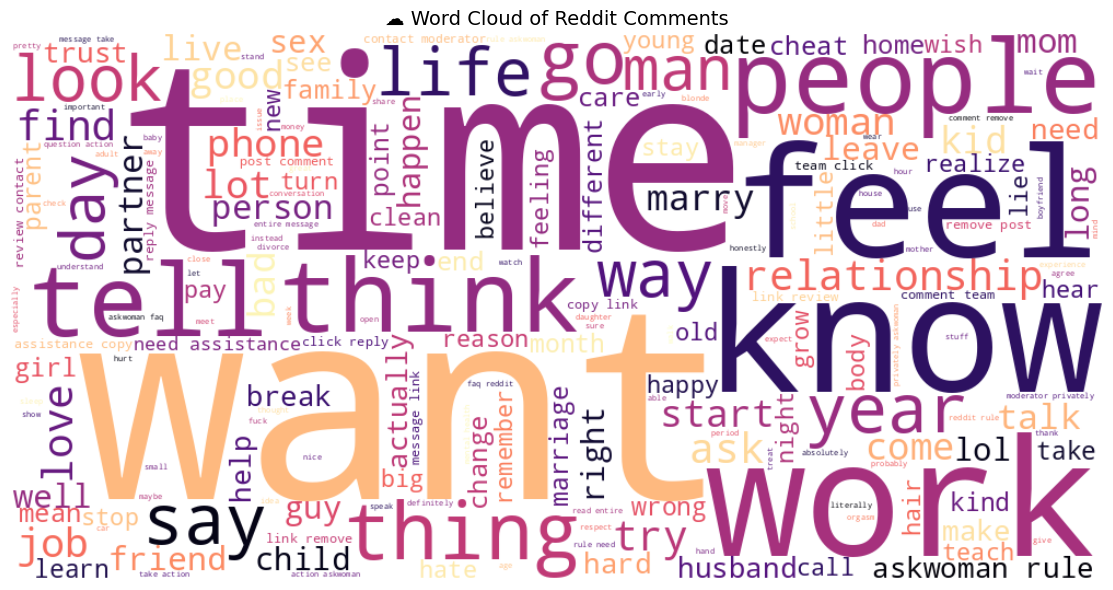

<ipython-input-8-7d24506621c9>:79: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


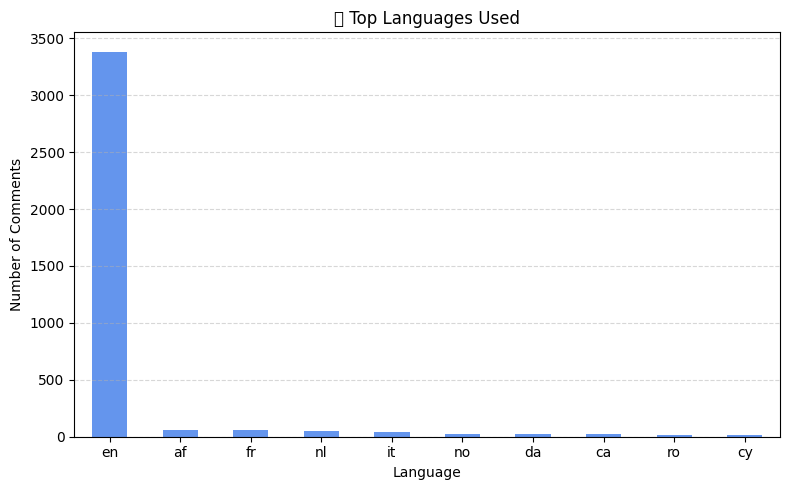

<ipython-input-8-7d24506621c9>:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


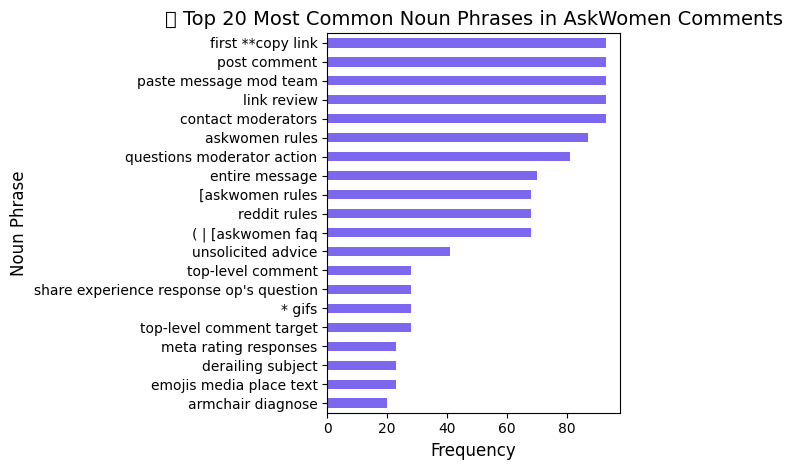

In [8]:
# 🟩 Load preprocessed CSV
import pandas as pd
df = pd.read_csv("askwomen_FINAL_preprocessed.csv")

# 📏 Add a column for comment length (based on spacy_filtered now!)
df["len"] = df["spacy_filtered"].str.len()

# 📊 DESCRIPTIVE STATS
print(df["len"].describe())         # Summary stats
print(df["len"].mode().iloc[0])     # Most common length

# 🧑‍💬 AVERAGE COMMENT LENGTH BY AUTHOR (optional)
df.groupby("comment_author")["len"].mean().sort_values(ascending=False).head(10)

# 🕒 TIME SERIES — COMMENTS PER DAY
df["comment_datetime"] = pd.to_datetime(df["comment_datetime"])
daily = df.groupby(df["comment_datetime"].dt.date)["spacy_filtered"].count()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
daily.plot(kind="line", marker="o")
plt.title("📅 Comment Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔠 TOP 20 WORDS (from spacy_filtered)
from collections import Counter
word_counter = Counter()
for comment in df["spacy_filtered"]:
    word_counter.update(comment.split())

top_words = word_counter.most_common(20)

# 📊 BARPLOT
import seaborn as sns
import matplotlib.pyplot as plt

top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
plt.figure(figsize=(10,6))
sns.barplot(data=top_words_df, x="count", y="word", palette="flare")
plt.title("💬 Top 20 Most Frequent Words (SpaCy Filtered)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# ☁️ WORD CLOUD (from spacy_filtered)
from wordcloud import WordCloud
text = " ".join(df["spacy_filtered"].tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='magma', max_words=200).generate(text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Word Cloud of Reddit Comments", fontsize=14)
plt.tight_layout()
plt.show()

# 🌍 LANGUAGE DISTRIBUTION — this part is still okay using cleaned_comment
from langdetect import detect
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"
df["lang"] = df["spacy_filtered"].apply(detect_lang)

lang_counts = df["lang"].value_counts().head(10)
plt.figure(figsize=(8,5))
lang_counts.plot(kind="bar", color="cornflowerblue")
plt.title("🗣️ Top Languages Used")
plt.xlabel("Language")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📦 NOUN PHRASES (you already created np_counter earlier using spaCy)
top_nps = pd.DataFrame(np_counter.most_common(20), columns=['Noun Phrase', 'Frequency'])

plt.figure(figsize=(12, 7))
top_nps.sort_values(by='Frequency').plot.barh(x='Noun Phrase', y='Frequency', color='mediumslateblue', legend=False)
plt.title("🔍 Top 20 Most Common Noun Phrases in AskWomen Comments", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Noun Phrase", fontsize=12)
plt.tight_layout()
plt.show()



In [9]:
#Identify Top Threads on Peak Days of Engagement

# ✅ Step 1: Convert full datetime to date only
df["date_only"] = pd.to_datetime(df["comment_datetime"]).dt.date

# ✅ Step 2: Get top 5 most active dates (highest comment volume)
top_dates = df["date_only"].value_counts().sort_values(ascending=False).head(5)
print("📅 Top 5 Most Active Dates:\n", top_dates)

# ✅ Step 3: Loop through top dates to show most active threads per day
for date in top_dates.index:
    print(f"\n📌 Threads on {date} (Total comments: {top_dates[date]})")
    top_threads = df[df["date_only"] == date]["thread_title"].value_counts().head(5)
    print(top_threads)

📅 Top 5 Most Active Dates:
 date_only
2025-04-14    433
2025-04-13    359
2025-04-07    337
2025-04-15    335
2025-04-02    331
Name: count, dtype: int64

📌 Threads on 2025-04-14 (Total comments: 433)
thread_title
Women of Reddit, what is the worst job you ever had?                                               254
Married, what is your greatest regret about marriage?                                               62
How does being blonde or brunette affect the way people treat you or perceive your personality?     45
What helped get your spark back after a bad break up?                                               28
When did you experience your first orgasm?                                                          22
Name: count, dtype: int64

📌 Threads on 2025-04-13 (Total comments: 359)
thread_title
Married, what is your greatest regret about marriage?                                             177
When did you experience your first orgasm?                                         

<ipython-input-10-378a12d98a70>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "comment_count"))


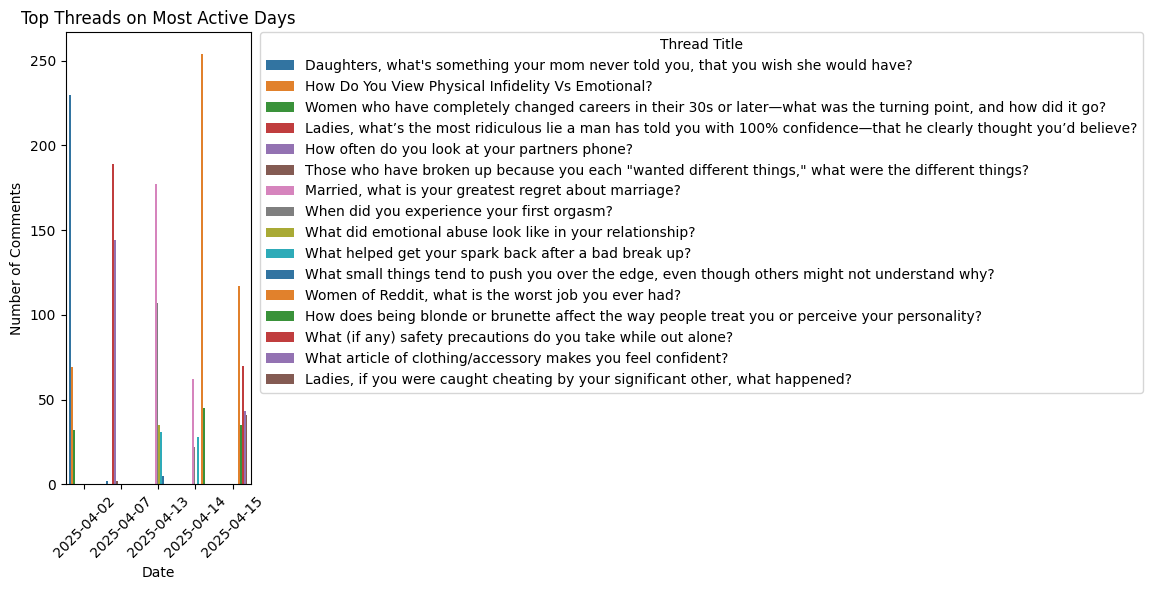

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract just the date from the comment datetime
df["date_only"] = pd.to_datetime(df["comment_datetime"]).dt.date

# Step 2: Identify the top 5 most active dates
top_dates = df["date_only"].value_counts().sort_values(ascending=False).head(5).index

# Step 3: Filter dataset to only include those dates
filtered_df = df[df["date_only"].isin(top_dates)]

# Step 4: Group by date and thread title, count comments
thread_counts = (
    filtered_df.groupby(["date_only", "thread_title"])
    .size()
    .reset_index(name="comment_count")
)

# Optional: Keep only top 5 threads per date for cleaner plot
top_threads_per_day = (
    thread_counts.groupby("date_only")
    .apply(lambda x: x.nlargest(5, "comment_count"))
    .reset_index(drop=True)
)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_threads_per_day,
    x="date_only",
    y="comment_count",
    hue="thread_title",
    dodge=True,
    palette="tab10"
)

plt.title("Top Threads on Most Active Days")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.legend(title="Thread Title", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

<ipython-input-11-ca14db04a474>:21: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


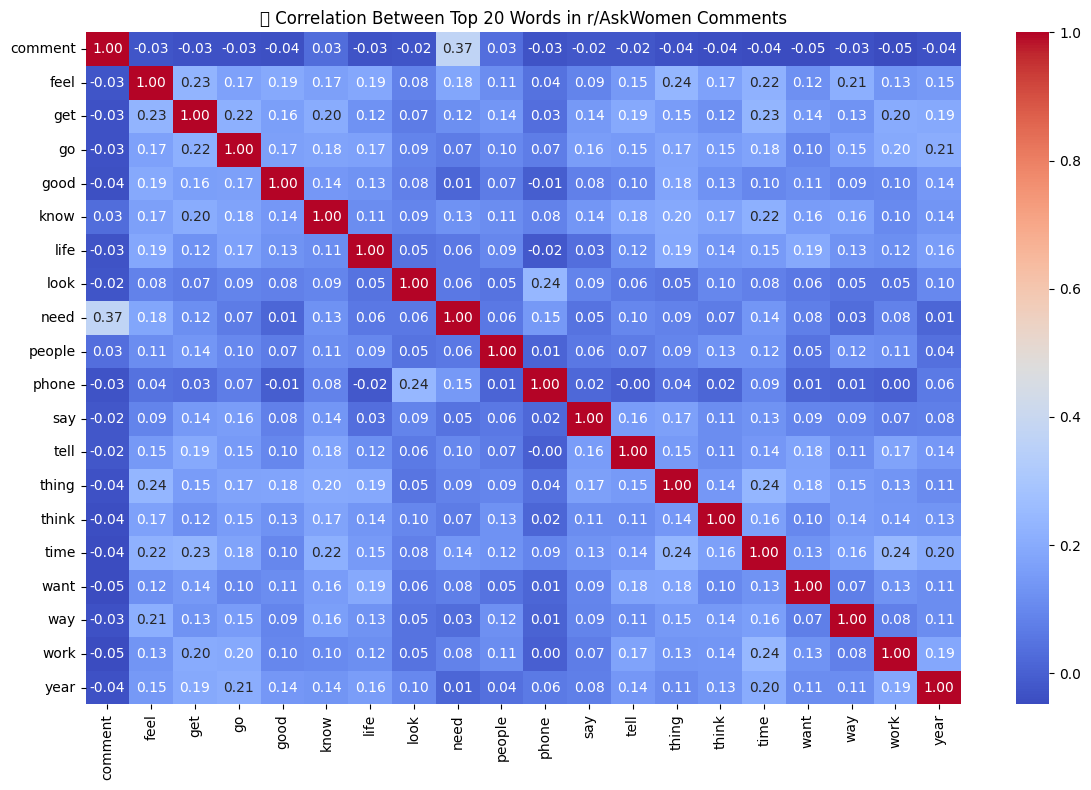

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Join all spaCy-filtered comments
text = df["spacy_filtered"].dropna().astype(str)

# Vectorize using CountVectorizer
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(text)
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Compute correlation matrix
correlation_matrix = df_bow.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Between Top 20 Words in r/AskWomen Comments")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-12-6c174ccd02eb>:37: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


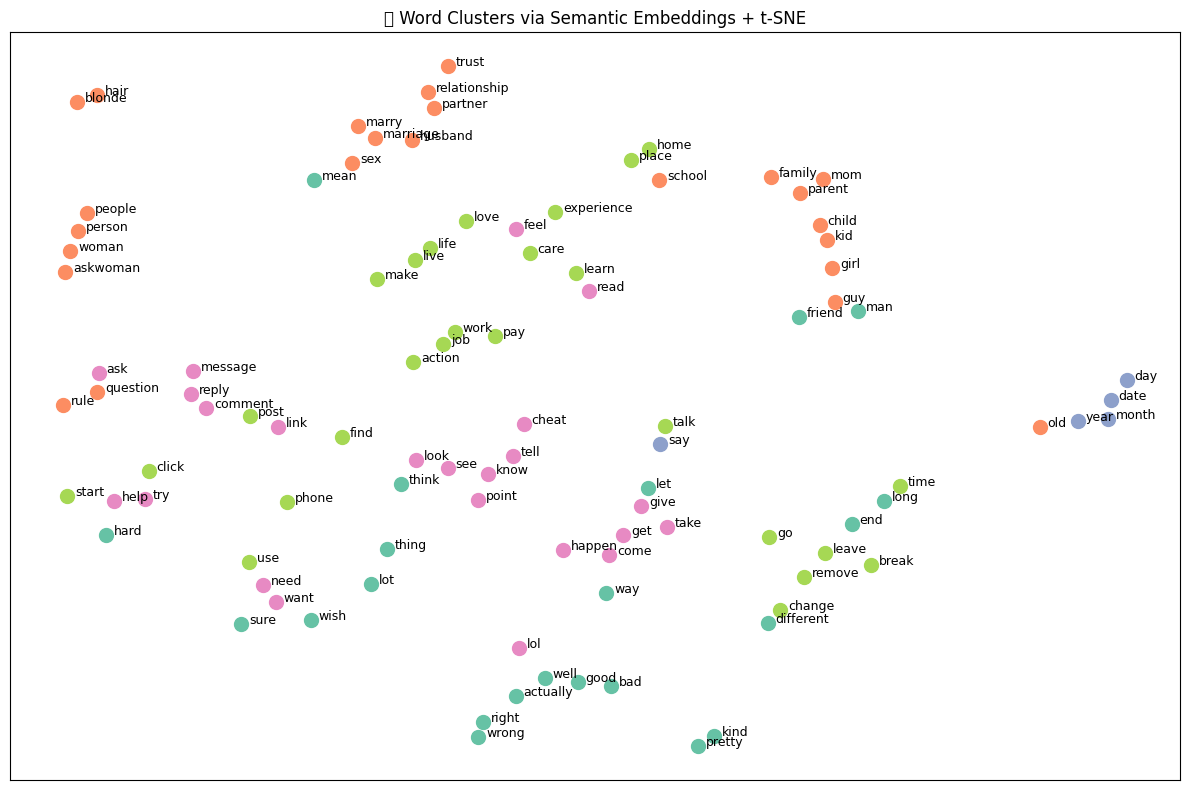

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract top N frequent words from spaCy-filtered comments
text = df["spacy_filtered"].dropna().astype(str)
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(text)
words = vectorizer.get_feature_names_out()

# 2. Get sentence embeddings of each word
model = SentenceTransformer("all-MiniLM-L6-v2")
word_embeddings = model.encode(words)

# 3. Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(word_embeddings)

# 4. Optional: Cluster words using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(word_embeddings)

# 5. Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", n_colors=5)
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1], color=palette[labels[i]], s=100)
    plt.text(reduced[i, 0]+0.5, reduced[i, 1], word, fontsize=9)

plt.title("🧠 Word Clusters via Semantic Embeddings + t-SNE")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()



<ipython-input-13-a5ca87cf413b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=thread_counts.index, x=thread_counts.values, palette="viridis")
<ipython-input-13-a5ca87cf413b>:10: UserWarning: Glyph 129525 (\N{SPOOL OF THREAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129525 (\N{SPOOL OF THREAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


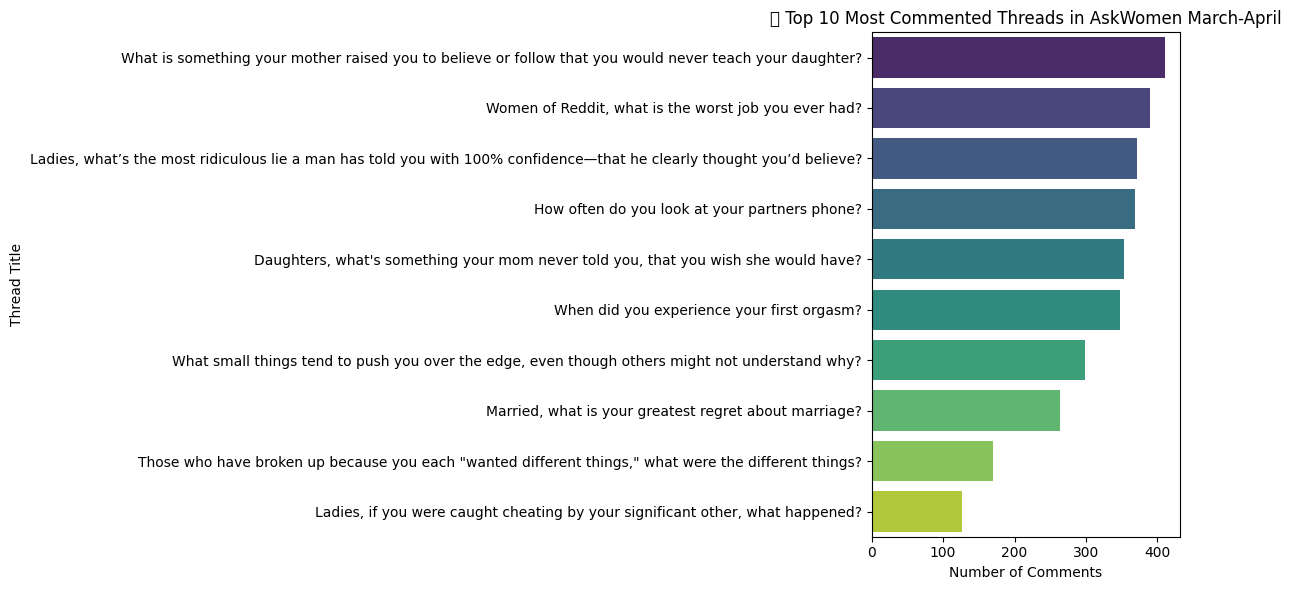

In [13]:
#Bar Chart: Most Active Threads (by Comment Volume)

thread_counts = df["thread_title"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=thread_counts.index, x=thread_counts.values, palette="viridis")
plt.title("🧵 Top 10 Most Commented Threads in AskWomen March-April")
plt.xlabel("Number of Comments")
plt.ylabel("Thread Title")
plt.tight_layout()
plt.show()


In [14]:
#Which comments resonated most with readers?

#Most upvoted comments top10
top_upvoted = df.sort_values(by="comment_score", ascending=False)[["cleaned_comment", "comment_score"]].head(10)
display(top_upvoted)

# Total number of comments
total_comments = len(df)

# Comments with > 1000 upvotes
viral_comments = df[df["comment_score"] > 1000]
viral_count = len(viral_comments)

# Percentage calculation
viral_percentage = (viral_count / total_comments) * 100
print(f"{viral_count} out of {total_comments} comments ({viral_percentage:.2f}%) received over 1,000 upvotes.")



,cleaned_comment,comment_score
1433,"“i plagiarize part essay.” ladies, said “[clic...",1571
2191,"married bit now, honestly, biggest regret taki...",1437
1449,invites tell mood says: “i want hang out. prom...,1307
2825,"actually ""mature age', men predators sense vul...",1300
703,dry humping teddy bears 10 🤭🤭,1228
3324,"“do speak up, disrespectful.” yeah, no. daught...",1085
1434,"""i 6'1. must wrong height."" really care guy in...",1014
2454,never. need to. ever get point feel need go ph...,994
1437,"""i see text"" watching tv, looks phone stands t...",787
0,anything customer service fkn worth it.,769


7 out of 3803 comments (0.18%) received over 1,000 upvotes.


<ipython-input-15-6c8a379ea75c>:6: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


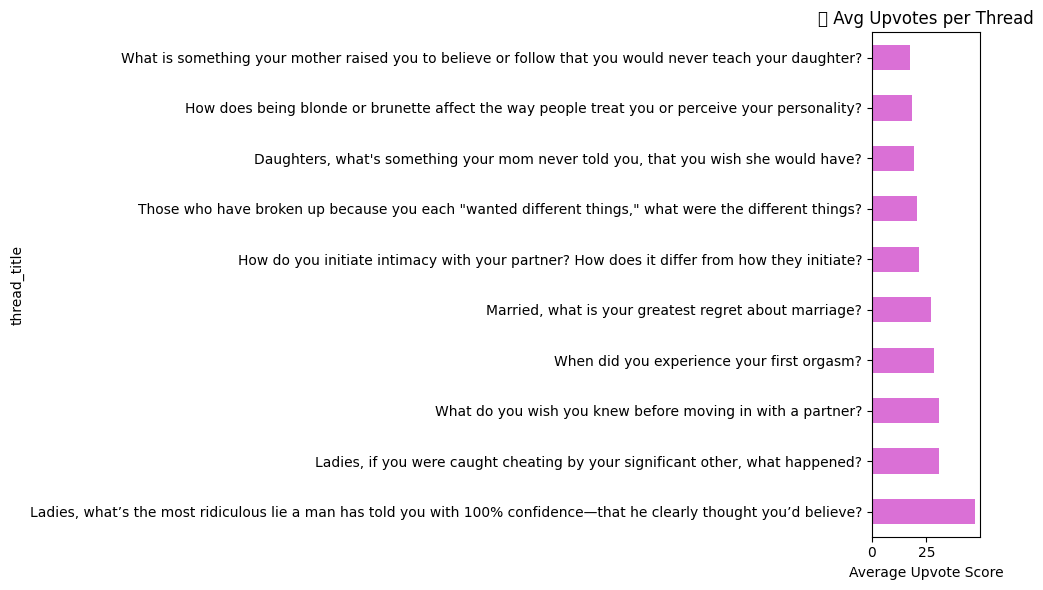

In [15]:
# 📊 Average upvote score per thread
df.groupby("thread_title")["comment_score"].mean().sort_values(ascending=False).head(10).plot(
    kind='barh', color='orchid', figsize=(10,6), title="💡 Avg Upvotes per Thread"
)
plt.xlabel("Average Upvote Score")
plt.tight_layout()
plt.show()



Correlation between number of comments and average upvotes: 0.30


<ipython-input-16-666a7a5f9bbe>:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


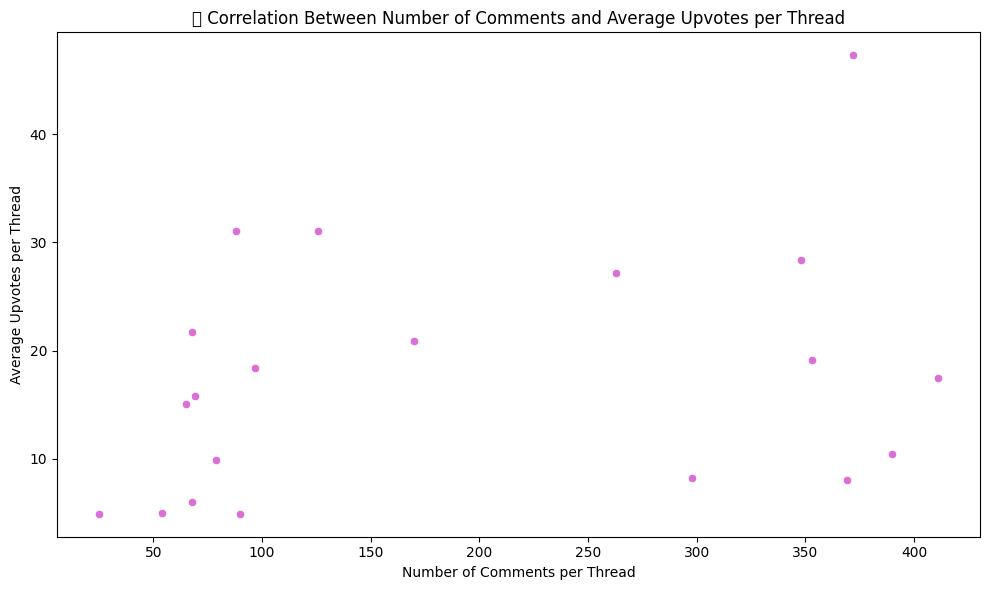

Correlation: 0.30


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by thread and calculate:
# - total comments per thread
# - average upvote score per thread (or total, if you prefer)
thread_stats = df.groupby("thread_title").agg(
    num_comments=("cleaned_comment", "count"),
    avg_upvotes=("comment_score", "mean")
).reset_index()

# Calculate Pearson correlation
correlation = thread_stats["num_comments"].corr(thread_stats["avg_upvotes"])
print(f"Correlation between number of comments and average upvotes: {correlation:.2f}")

# Visualize it
plt.figure(figsize=(10, 6))
sns.scatterplot(data=thread_stats, x="num_comments", y="avg_upvotes", color="orchid")
plt.title("📈 Correlation Between Number of Comments and Average Upvotes per Thread")
plt.xlabel("Number of Comments per Thread")
plt.ylabel("Average Upvotes per Thread")
plt.tight_layout()
plt.show()


#Also calcuate Pearson correlation coefficient
correlation = thread_stats["num_comments"].corr(thread_stats["avg_upvotes"])
print(f"Correlation: {correlation:.2f}")


Sentiment Analysis

In [17]:
# Create our own sentiment word mapping from VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import defaultdict
import nltk
nltk.download("vader_lexicon")

# Load base VADER lexicon
analyzer = SentimentIntensityAnalyzer()
mapping = dict(analyzer.lexicon)  # Convert from defaultdict to dict for easy editing

# Preview extreme values
{word: score for word, score in mapping.items() if abs(score) > 3}

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'143': 3.2,
 '187': -3.1,
 '4q': -3.1,
 'aml': 3.4,
 'd8': -3.2,
 'd:<': -3.2,
 'fu': -3.7,
 'ilu': 3.4,
 'ily': 3.4,
 'kia': -3.2,
 'lya': 3.3,
 'lyl': 3.1,
 'vbs': 3.1,
 'abhorrent': -3.1,
 'abuse': -3.2,
 'abusive': -3.2,
 'angriest': -3.1,
 'apocalyptic': -3.4,
 'awesome': 3.1,
 'best': 3.2,
 'betray': -3.2,
 'brutal': -3.1,
 'brutalises': -3.2,
 'brutalizes': -3.2,
 'brutalizing': -3.4,
 'bullied': -3.1,
 'cancer': -3.4,
 'catastrophe': -3.4,
 'cheerfullest': 3.2,
 'cocksucker': -3.1,
 'crisis': -3.1,
 'dead': -3.3,
 'devastate': -3.1,
 'devastating': -3.3,
 'devastative': -3.2,
 'devil': -3.4,
 'dickhead': -3.1,
 'direful': -3.1,
 'disaster': -3.1,
 'doomed': -3.2,
 'dreadfulness': -3.2,
 'ecstacy': 3.3,
 'elated': 3.2,
 'enslave': -3.1,
 'euphoria': 3.3,
 'euphoric': 3.2,
 'evil': -3.4,
 'evildoer': -3.1,
 'evildoing': -3.1,
 'evillest': -3.3,
 'evilly': -3.4,
 'evilness': -3.1,
 'excellence': 3.1,
 'excellently': 3.1,
 'excruciating': -3.3,
 'excruciation': -3.4,
 'faggot': -3

In [22]:
import nltk
nltk.download('punkt_tab')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Download necessary tokenizer
#nltk.download('punkt')  # Only this is needed # This is not needed because we're using punkt_tab

# Define the bigram-only sentiment scoring function
def custom_sentiment_score_with_bigrams(text):
    text = text.lower()
    tokens = word_tokenize(text)

    # Generate bigrams only
    bigrams = [' '.join(bigram) for bigram in ngrams(tokens, 2)]

    score = 0
    count = 0
    for gram in bigrams:
        if gram in mapping:  # Uses your adjusted VADER lexicon
            score += mapping[gram]
            count += 1

    return round(score / count, 3) if count > 0 else 0

# Apply to cleaned comment column
df["custom_sentiment_bigram"] = df["cleaned_comment"].apply(custom_sentiment_score_with_bigrams)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime,cleaned_comment,spacy_filtered,lang,len,date_only,custom_sentiment_bigram
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21,anything customer service fkn worth it.,customer service worth,en,22,2025-04-14,0
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38,waitress. constantly getting flirted guys got ...,waitress constantly get flirt guy get creepy,en,44,2025-04-14,0
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13,volunteered lead daisy troop daughters younger...,volunteer daisy troop daughter young kid delig...,af,68,2025-04-14,0
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51,waitress people awful service workers. number ...,waitress people awful service worker number gu...,en,104,2025-04-14,0
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02,waitress tourist trap seafood restaurant seatt...,waitress tourist trap double summer management...,en,102,2025-04-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,How do you initiate intimacy with your partner...,**Please read this entire message before takin...,AskWomen-ModTeam,1.743358e+09,1,1,2025-03-30 18:11:56,**please read entire message taking action.** ...,read entire message take action derail topic p...,en,661,2025-03-30,0
3799,How do you initiate intimacy with your partner...,I got incredibly lucky. He’s definitely someth...,Louisianimal09,1.742703e+09,2,39,2025-03-23 04:03:58,got incredibly lucky. definitely something els...,get incredibly lucky definitely long past hone...,en,150,2025-03-23,0
3800,How do you initiate intimacy with your partner...,"Hello, /u/AdNatural8174! **Please read this e...",AskWomen-ModTeam,1.742756e+09,2,1,2025-03-23 18:56:06,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,0
3801,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,0


In [25]:
# Custom sentiment scoring with bigrams
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

def custom_sentiment_score_with_bigrams(text):
    text = text.lower()
    tokens = word_tokenize(text)

    # Create both unigrams and bigrams
    all_grams = tokens + [' '.join(bigram) for bigram in ngrams(tokens, 2)]

    score = 0
    count = 0
    for gram in all_grams:
        if gram in mapping:
            score += mapping[gram]
            count += 1

    return round(score / count, 3) if count > 0 else 0

# Apply to cleaned comments
df["custom_sentiment_bigram"] = df["cleaned_comment"].apply(custom_sentiment_score_with_bigrams)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime,cleaned_comment,spacy_filtered,lang,len,date_only,custom_sentiment_bigram,sentiment_label
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21,anything customer service fkn worth it.,customer service worth,en,22,2025-04-14,0.900,1
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38,waitress. constantly getting flirted guys got ...,waitress constantly get flirt guy get creepy,en,44,2025-04-14,-0.200,1
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13,volunteered lead daisy troop daughters younger...,volunteer daisy troop daughter young kid delig...,af,68,2025-04-14,2.800,1
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51,waitress people awful service workers. number ...,waitress people awful service worker number gu...,en,104,2025-04-14,-1.167,1
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02,waitress tourist trap seafood restaurant seatt...,waitress tourist trap double summer management...,en,102,2025-04-14,-1.750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,How do you initiate intimacy with your partner...,**Please read this entire message before takin...,AskWomen-ModTeam,1.743358e+09,1,1,2025-03-30 18:11:56,**please read entire message taking action.** ...,read entire message take action derail topic p...,en,661,2025-03-30,0.560,0
3799,How do you initiate intimacy with your partner...,I got incredibly lucky. He’s definitely someth...,Louisianimal09,1.742703e+09,2,39,2025-03-23 04:03:58,got incredibly lucky. definitely something els...,get incredibly lucky definitely long past hone...,en,150,2025-03-23,2.222,0
3800,How do you initiate intimacy with your partner...,"Hello, /u/AdNatural8174! **Please read this e...",AskWomen-ModTeam,1.742756e+09,2,1,2025-03-23 18:56:06,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,1.300,0
3801,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,1.300,0


In [27]:
# Custom scoring based on our mapping
def custom_sentiment_score(text):
    text = text.lower()
    score = 0
    n = 0
    for word in text.split():
        if word in mapping:
            score += mapping[word]
            n += 1
    return round(score / n, 3) if n > 0 else 0

df["custom_sentiment"] = df["cleaned_comment"].apply(custom_sentiment_score)
df


,thread_title,comment_body,comment_author,created_utc,comment_depth,comment_score,comment_datetime,cleaned_comment,spacy_filtered,lang,len,date_only,custom_sentiment_bigram,sentiment_label,custom_sentiment
0,"Women of Reddit, what is the worst job you eve...",Anything customer service is just not fkn wort...,geminiauture,1.744653e+09,0,769,2025-04-14 17:51:21,anything customer service fkn worth it.,customer service worth,en,22,2025-04-14,0.900,1,0.900
1,"Women of Reddit, what is the worst job you eve...",Being a waitress. Was constantly getting flirt...,beatease00,1.744653e+09,0,436,2025-04-14 17:50:38,waitress. constantly getting flirted guys got ...,waitress constantly get flirt guy get creepy,en,44,2025-04-14,-0.200,1,-0.200
2,"Women of Reddit, what is the worst job you eve...",I volunteered to lead a Daisy troop when my da...,tnannie,1.744653e+09,0,233,2025-04-14 17:56:13,volunteered lead daisy troop daughters younger...,volunteer daisy troop daughter young kid delig...,af,68,2025-04-14,2.800,1,0.000
3,"Women of Reddit, what is the worst job you eve...",Waitress because people are awful to service w...,MeditativeMama,1.744653e+09,0,155,2025-04-14 17:53:51,waitress people awful service workers. number ...,waitress people awful service worker number gu...,en,104,2025-04-14,-1.167,1,-1.100
4,"Women of Reddit, what is the worst job you eve...",Waitress at a tourist trap seafood restaurant ...,Polybrene,1.744653e+09,0,82,2025-04-14 17:57:02,waitress tourist trap seafood restaurant seatt...,waitress tourist trap double summer management...,en,102,2025-04-14,-1.750,0,-1.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,How do you initiate intimacy with your partner...,**Please read this entire message before takin...,AskWomen-ModTeam,1.743358e+09,1,1,2025-03-30 18:11:56,**please read entire message taking action.** ...,read entire message take action derail topic p...,en,661,2025-03-30,0.560,0,0.571
3799,How do you initiate intimacy with your partner...,I got incredibly lucky. He’s definitely someth...,Louisianimal09,1.742703e+09,2,39,2025-03-23 04:03:58,got incredibly lucky. definitely something els...,get incredibly lucky definitely long past hone...,en,150,2025-03-23,2.222,0,2.217
3800,How do you initiate intimacy with your partner...,"Hello, /u/AdNatural8174! **Please read this e...",AskWomen-ModTeam,1.742756e+09,2,1,2025-03-23 18:56:06,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,1.300,0,1.300
3801,How do you initiate intimacy with your partner...,"Hello, /u/hahaxd3! **Please read this entire ...",AskWomen-ModTeam,1.742758e+09,2,1,2025-03-23 19:25:58,"hello, /yo! **please read entire message takin...",read entire message take action comment remove...,en,433,2025-03-23,1.300,0,1.300


Mean Unigram Sentiment: 0.352
Mean Bigram-Inclusive Sentiment: 0.341


<ipython-input-28-d1e1f2ce1e3a>:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


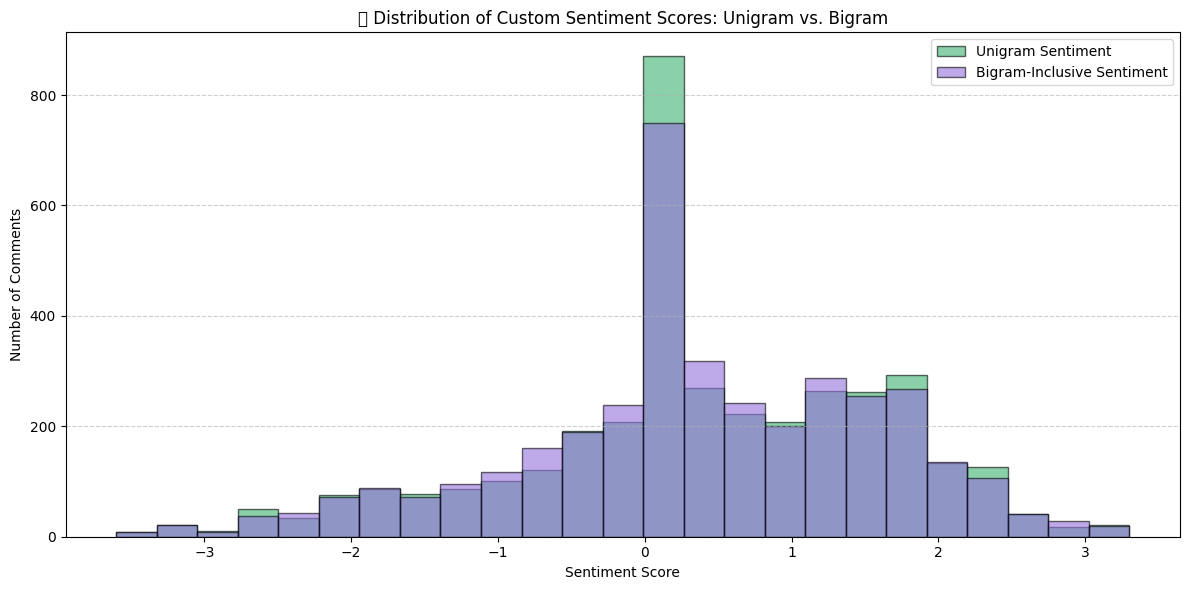

In [28]:
#Compare averages for custom sentiment and custom sentiment with bigrams

print("Mean Unigram Sentiment:", round(df["custom_sentiment"].mean(), 3))
print("Mean Bigram-Inclusive Sentiment:", round(df["custom_sentiment_bigram"].mean(), 3))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Unigram sentiment
plt.hist(df["custom_sentiment"], bins=25, alpha=0.6, label="Unigram Sentiment", color='mediumseagreen', edgecolor='black')

# Bigram-inclusive sentiment
plt.hist(df["custom_sentiment_bigram"], bins=25, alpha=0.6, label="Bigram-Inclusive Sentiment", color='mediumpurple', edgecolor='black')

plt.title("📈 Distribution of Custom Sentiment Scores: Unigram vs. Bigram")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [29]:
import pandas as pd

# Top 5 most positive comments
print("✨ Most Positive Comments:")
print(df.sort_values("custom_sentiment", ascending=False)[["comment_body", "custom_sentiment"]].head(5))

# Top 5 most negative comments
print("\n💔 Most Negative Comments:")
print(df.sort_values("custom_sentiment")[["comment_body", "custom_sentiment"]].head(5))


✨ Most Positive Comments:
                                           comment_body  custom_sentiment
1520  “We aren’t even dating.”\n\nTurns out, it was ...               3.3
680   Had to ask to be a priority over and over agai...               3.2
2167  surround yourself with people who genuinely lo...               3.2
723   Age 15, solo. Quickly learned the best way to ...               3.2
467   Idk but I love my brunette hair and I love the...               3.2

💔 Most Negative Comments:
                                           comment_body  custom_sentiment
3644             Did you grow up in my house? Holy hell              -3.6
3536     If you don’t get baptized you’re going to hell              -3.6
1307  I did the same thing last week, forgot the cof...              -3.6
907                Age 4 while being raped by my father              -3.6
204        Retail and Customer service killed sth in me              -3.5


<ipython-input-31-d8f7bce51c32>:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


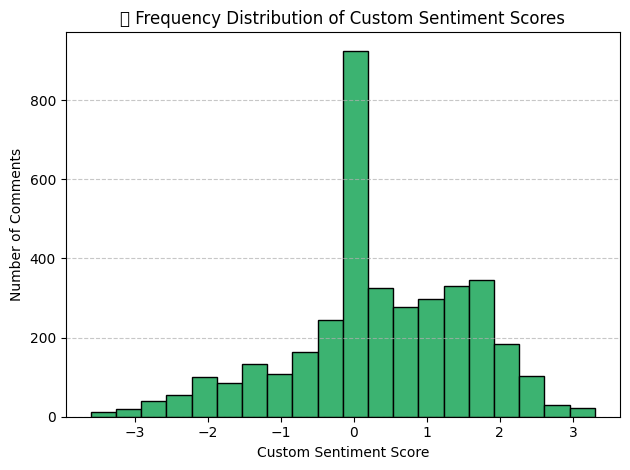

🧮 Mean Custom Sentiment Score: 0.352


In [31]:
import matplotlib.pyplot as plt

# Plot histogram of custom sentiment
df["custom_sentiment"].plot(
    kind='hist',
    bins=20,
    color='mediumseagreen',
    edgecolor='black',
    title="📈 Frequency Distribution of Custom Sentiment Scores"
)
plt.xlabel("Custom Sentiment Score")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Show mean score
print("🧮 Mean Custom Sentiment Score:", round(df["custom_sentiment"].mean(), 3))


Also score sentiment with TextBlob

<ipython-input-32-7f83d7da107b>:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


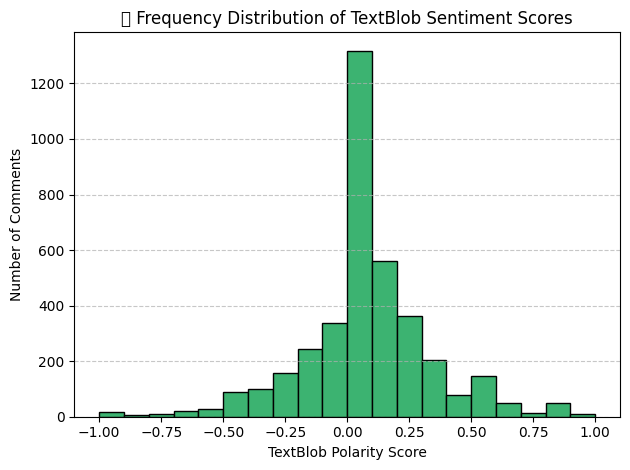

🧮 Mean TextBlob Sentiment Score: 0.071


In [32]:
# Install and import TextBlob
from textblob import TextBlob

# Define function to calculate TextBlob polarity score
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (negative) to +1 (positive)

# Apply to 'cleaned_comment' column
df['textblob_score'] = df['cleaned_comment'].apply(get_textblob_sentiment)

# Plot sentiment score distribution
import matplotlib.pyplot as plt

df["textblob_score"].plot(
    kind='hist',
    bins=20,
    color='mediumseagreen',
    edgecolor='black',
    title="📈 Frequency Distribution of TextBlob Sentiment Scores"
)
plt.xlabel("TextBlob Polarity Score")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print mean sentiment score
print("🧮 Mean TextBlob Sentiment Score:", round(df["textblob_score"].mean(), 3))


Now lets compare Custom Sentiment Score and TextBlob

       textblob_score  custom_sentiment
count     3803.000000       3803.000000
mean         0.070648          0.352022
std          0.266218          1.225659
min         -1.000000         -3.600000
25%         -0.018524         -0.156500
50%          0.040000          0.220000
75%          0.200000          1.300000
max          1.000000          3.300000


<ipython-input-32-6c1dddd507f1>:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


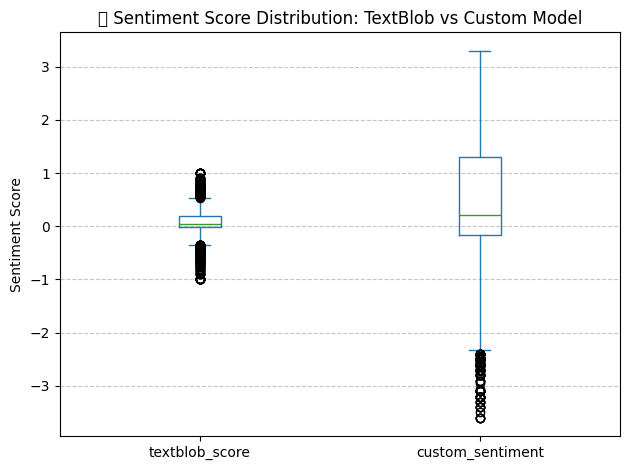

In [32]:
comparison_df = df[['textblob_score', 'custom_sentiment']]
print(comparison_df.describe())

comparison_df.plot(kind='box', title="📦 Sentiment Score Distribution: TextBlob vs Custom Model")
plt.ylabel("Sentiment Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-33-c4b464260be0>:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


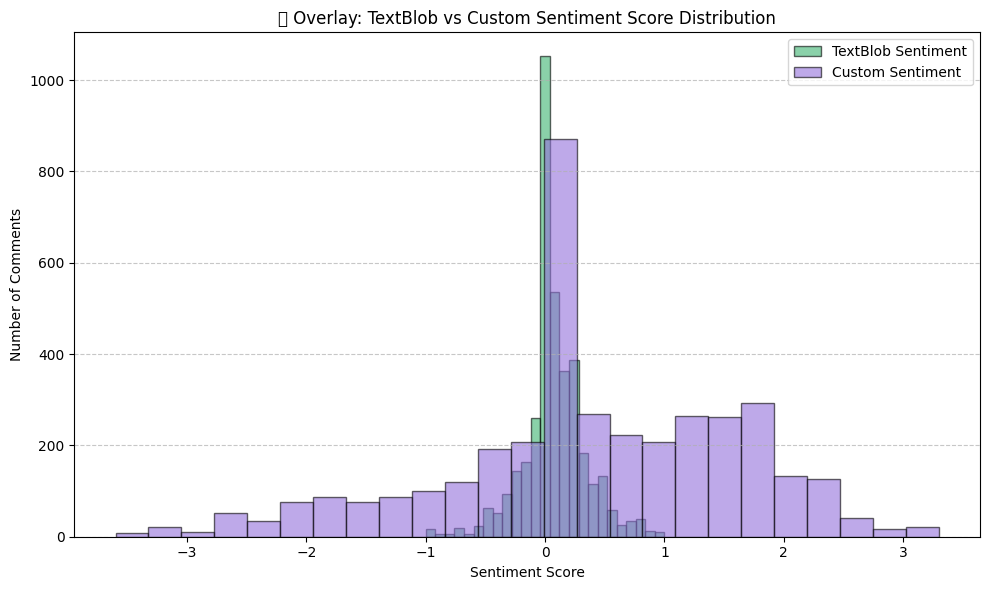

🧮 Mean TextBlob Sentiment Score: 0.071
🧮 Mean Custom Sentiment Score: 0.352


In [33]:
import matplotlib.pyplot as plt

# Plot overlaid histograms
plt.figure(figsize=(10, 6))

# TextBlob histogram
df["textblob_score"].plot(
    kind='hist',
    bins=25,
    alpha=0.6,
    color='mediumseagreen',
    edgecolor='black',
    label='TextBlob Sentiment'
)

# Custom sentiment histogram
df["custom_sentiment"].plot(
    kind='hist',
    bins=25,
    alpha=0.6,
    color='mediumpurple',
    edgecolor='black',
    label='Custom Sentiment'
)

# Plot formatting
plt.title("📊 Overlay: TextBlob vs Custom Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print mean sentiment scores
print("🧮 Mean TextBlob Sentiment Score:", round(df["textblob_score"].mean(), 3))
print("🧮 Mean Custom Sentiment Score:", round(df["custom_sentiment"].mean(), 3))


Topic Modelling LDA

In [33]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd # Import pandas

# Load your dataset - Assuming your CSV is named 'askwomen_FINAL_preprocessed.csv'
df = pd.read_csv("askwomen_FINAL_preprocessed.csv")

# Tokenized spaCy column for LDA
texts = df["spacy_filtered"].dropna().astype(str).str.split()

# Filter out stopwords again (if needed)
stop_words = set(stopwords.words("english"))
texts = [[word for word in doc if word not in stop_words] for doc in texts]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=6,       # Change if needed
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)


In [4]:
#Print top words per topic

for i, topic in lda_model.show_topics(num_topics=6, num_words=10, formatted=False):
    print(f"\n🔹 Topic {i+1}:")
    print(", ".join([word for word, prob in topic]))



🔹 Topic 1:
know, time, year, tell, think, feel, thing, go, sex, ask

🔹 Topic 2:
hair, get, feel, people, love, work, blonde, know, man, year

🔹 Topic 3:
comment, rule, message, link, askwoman, remove, question, action, post, reply

🔹 Topic 4:
want, thing, feel, relationship, marry, time, life, good, way, kid

🔹 Topic 5:
phone, look, know, trust, need, time, snoop, ask, find, use

🔹 Topic 6:
work, job, people, good, year, pay, go, time, feel, get


<ipython-input-6-a3b605669a02>:30: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


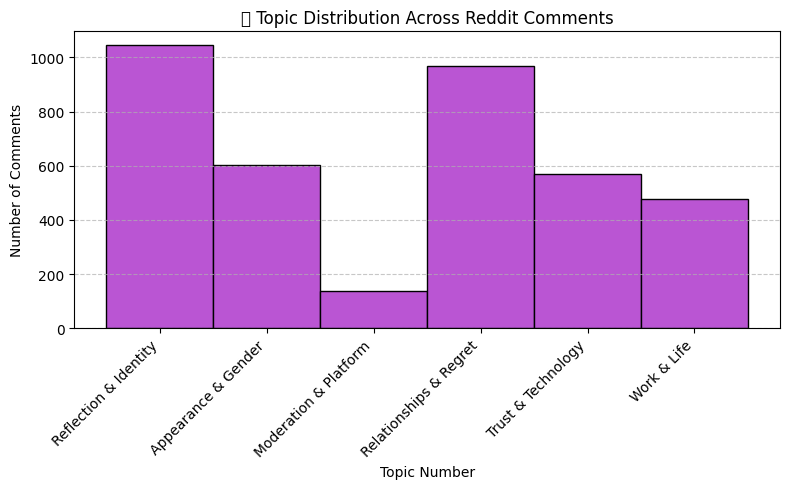

In [6]:
#Create a dictionary to label topics
topic_labels = [
    "Reflection & Identity",       # Topic 1
    "Appearance & Gender",         # Topic 2
    "Moderation & Platform",       # Topic 3
    "Relationships & Regret",      # Topic 4
    "Trust & Technology",          # Topic 5
    "Work & Life"                  # Topic 6
]
#Visualize Topic Distribution

import matplotlib.pyplot as plt
import numpy as np

# Get dominant topic per document
topic_distribution = []
for bow in corpus:
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    topic_distribution.append(dominant_topic)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(topic_distribution, bins=range(7), align='left', color="mediumorchid", edgecolor="black")
plt.title("🧠 Topic Distribution Across Reddit Comments")
plt.xlabel("Topic Number")
plt.ylabel("Number of Comments")
plt.xticks(ticks=np.arange(6), labels=topic_labels, rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
